#Reparameterization Trick

Here we will understand the reparameterization trick used by Kingma and Welling (2014) to train their variational autoencoder.  

Assume we have a normal distribution $q$ that is parameterized by $\theta$, specifically $q_{\theta}(x) = N(\theta,1)$. We want to solve the below problem
$$
\text{min}_{\theta} \quad E_q[x^2]
$$
This is of course a rather silly problem and the optimal $\theta$ is obvious. We want to understand how the reparameterization trick helps in calculating the gradient of this objective $E_q[x^2]$.

One way to calculate $\nabla_{\theta} E_q[x^2]$ is as follows
$$
\nabla_{\theta} E_q[x^2] = \nabla_{\theta} \int q_{\theta}(x) x^2 dx = \int x^2 \nabla_{\theta} q_{\theta}(x) \frac{q_{\theta}(x)}{q_{\theta}(x)} dx = \int q_{\theta}(x) \nabla_{\theta} \log q_{\theta}(x) x^2 dx = E_q[x^2 \nabla_{\theta} \log q_{\theta}(x)]
$$

For our example where $q_{\theta}(x) = N(\theta,1)$, this method gives
$$
\nabla_{\theta} E_q[x^2] = E_q[x^2 (x-\theta)]
$$

Reparameterization trick is a way to rewrite the expectation so that the distribution with respect to which we take the expectation is independent of parameter $\theta$. To achieve this, we need to make the stochastic element in $q$ independent of $\theta$. Hence, we write $x$ as
$$
x = \theta + \epsilon, \quad \epsilon \sim N(0,1)
$$
Then, we can write
$$
E_q[x^2] = E_p[(\theta+\epsilon)^2]
$$
where $p$ is the distribution of $\epsilon$, i.e., $N(0,1)$. Now we can write the derivative of $E_q[x^2]$ as follows
$$
\nabla_{\theta} E_q[x^2] = \nabla_{\theta} E_p[(\theta+\epsilon)^2] = E_p[2(\theta+\epsilon)]
$$

Now let us compare the variances of the two methods; we are hoping to see that the first method has high variance while reparameterization trick decreases the variance substantially.

In [4]:
import numpy as np
N = 1000
theta = 2.0
eps = np.random.randn(N)
x = theta + eps

grad1 = lambda x: np.sum(np.square(x)*(x-theta)) / x.size
grad2 = lambda eps: np.sum(2*(theta + eps)) / x.size

print(grad1(x))
print(grad2(eps))


3.8708528740985906
3.9299307267420374


Let us plot the variance for different sample sizes.

In [5]:
Ns = [10, 100, 1000, 10000, 100000]
reps = 100

means1 = np.zeros(len(Ns))
vars1 = np.zeros(len(Ns))
means2 = np.zeros(len(Ns))
vars2 = np.zeros(len(Ns))

est1 = np.zeros(reps)
est2 = np.zeros(reps)
for i, N in enumerate(Ns):
    for r in range(reps):
        x = np.random.randn(N) + theta
        est1[r] = grad1(x)
        eps = np.random.randn(N)
        est2[r] = grad2(eps)
    means1[i] = np.mean(est1)
    means2[i] = np.mean(est2)
    vars1[i] = np.var(est1)
    vars2[i] = np.var(est2)

print(means1)
print(means2)
# print
print(vars1)
print(vars2)

# 结论
# 两种算法期望差不多, 不管是采样的多少
# 两种算法方差差别大，在采样多于 1000 之后，这种差异才缓和。 tr 可做到少一个数量级的采样来达到类似效果

[3.99681956 3.9006123  3.99833815 3.99961653 3.99563444]
[3.93952511 4.01081156 3.99826452 3.99865597 3.99920026]
[8.09247630e+00 7.61123818e-01 9.22096212e-02 9.83824391e-03
 7.45751677e-04]
[2.67748889e-01 5.29970068e-02 5.20155612e-03 4.12298116e-04
 3.27479716e-05]


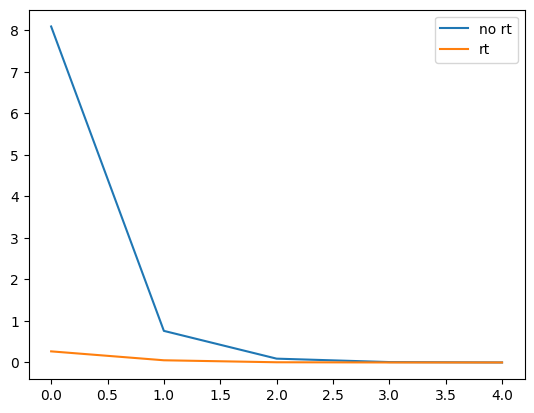

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(vars1)
plt.plot(vars2)
plt.legend(['no rt', 'rt'])



Variance of the estimates using reparameterization trick is one order of magnitude smaller than the estimates from the first method!